In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [92]:
data = pd.read_pickle('data.pkl')

In [93]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,player_slot,hero,rad_dir,my_win,stats_dict,abandons,ability_targets,ability_upgrades_arr,ability_uses,account_id,actions,additional_units,assists,backpack_0,backpack_1,backpack_2,backpack_3,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,buyback_log,camps_stacked,connection_log,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,dn_t,firstblood_claimed,gold,gold_per_min,gold_reasons,gold_spent,gold_t,hero_damage,hero_healing,hero_hits,hero_id,isRadiant,is_contributor,is_subscriber,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_uses,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane_pos,last_hits,last_login,leaver_status,level,lh_t,life_state,lose,max_hero_hit,multi_kills,name_x,net_worth,obs,obs_left_log,obs_log,obs_placed,party_id,party_size,performance_others,permanent_buffs,personaname,pings,pred_vict,purchase,purchase_log,randomed,rank_tier,repicked,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,towers_killed,win,xp_per_min,xp_reasons,xp_t,average_rank,id,name_y,localized_name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,turbo_picks,turbo_wins,pro_ban,pro_win,pro_pick,1_pick,1_win,2_pick,2_win,3_pick,3_win,4_pick,4_win,5_pick,5_win,6_pick,6_win,7_pick,7_win,8_pick,8_win,null_pick,null_win
0,7192136714.00,63.00,3.00,None,117.00,None,37.00,NaN,None,2210.00,1.00,174.00,22.00,10.00,0.00,7.00,6045553707.00,0.00,None,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",0.00,None,12.00,NaN,False,None,NaN,1686279398.00,None,1974.00,6.00,NaN,1839270556.00,0.00,0.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,http://replay117.valve.net/570/7192136714_1839...,NaN,NaN,NaN,NaN,NaN,NaN,3.00,Medusa,Radiant,False,"{'match_id': 7192136714, 'player_slot': 3, 'ab...",0.00,NaN,"[5505, 5505, 5506, 5504, 5505, 5504, 5504, 550...",NaN,190040093.00,NaN,None,2.00,0.00,0.00,0.00,NaN,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,2.00,6.00,None,NaN,503.00,490.00,NaN,18475.00,None,21640.00,0.00,NaN,94.00,True,False,False,88.00,36.00,160.00,139.00,63.00,147.00,573.00,NaN,0.00,NaN,NaN,NaN,0.00,None,NaN,NaN,289.00,NaN,0.00,19.00,None,NaN,1.00,NaN,NaN,NaN,17753.00,NaN,None,None,NaN,3.00,1.00,NaN,[],a_fat,NaN,None,NaN,None,None,35.00,NaN,NaN,NaN,NaN,None,NaN,None,None,NaN,NaN,NaN,None,18048.00,21252.00,147.00,NaN,0.00,577.00,NaN,None,35.00,94.00,npc_dota_hero_medusa,Medusa,agi,Ranged,"[Carry, Disabler, Durable]",/apps/dota2/images/dota_react/heroes/medusa.png?,/apps/dota2/images/dota_react/heroes/icons/med...,120.00,0.25,75.00,0.00,-1.00,25.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,

In [94]:
data.shape

(5489, 220)

In [95]:
# dropping a lot of columns with nan. Some of them due to data being not tracked or incomplete.

data.isna().sum()

match_id                                  1
barracks_status_dire                      1
barracks_status_radiant                   1
chat                                   5076
cluster                                   1
cosmetics                              5076
dire_score                                1
dire_team_id                           5483
draft_timings                          5127
duration                                  1
engine                                    1
first_blood_time                          1
game_mode                                 1
human_players                             1
leagueid                                  1
lobby_type                                1
match_seq_num                             1
negative_votes                            1
objectives                             5076
picks_bans                             1002
positive_votes                            1
radiant_gold_adv                       5076
radiant_score                   

In [96]:
data.drop(data.loc[:, 'turbo_picks':'null_win'], axis = 1, inplace = True)

In [97]:
data.drop(['hero_hits', 'additional_units', 'img', 'icon', 'name_y', 'xp_reasons', 'xp_t', 'win', 'randomed', 'personaname', 'pings', 'name_x', 'life_state', 'lh_t', 'last_login', 'is_subscriber', 'is_contributor', 'gold_t', 'gold_reasons', 'dn_t', 'connection_log', 'backpack_3'], axis = 1, inplace = True)

In [98]:
data.drop(data.loc[:, 'version':'series_type'], axis = 1, inplace = True)

In [99]:
data.drop(data.loc[:, 'replay_url':'stomp'], axis = 1, inplace = True)

In [100]:
data.drop(['localized_name', 'stats_dict', 'cosmetics', 'engine', 'match_seq_num', 'negative_votes', 'positive_votes', 'radiant_team_id', 'radiant_win', 'dire_team_id'], axis = 1, inplace = True)

In [101]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,dire_score,draft_timings,duration,first_blood_time,game_mode,human_players,leagueid,lobby_type,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,ability_targets,ability_upgrades_arr,ability_uses,account_id,actions,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,buyback_log,camps_stacked,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_uses,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane_pos,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,obs,obs_left_log,obs_log,obs_placed,party_id,party_size,performance_others,permanent_buffs,pred_vict,purchase,purchase_log,rank_tier,repicked,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,towers_killed,xp_per_min,average_rank,id,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7192136714.00,63.00,3.00,None,117.00,37.00,None,2210.00,174.00,22.00,10.00,0.00,7.00,None,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",None,12.00,None,NaN,1686279398.00,None,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,Radiant,False,0.00,NaN,"[5505, 5505, 5506, 5504, 5505, 5504, 5504, 550...",NaN,190040093.00,NaN,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,6.00,NaN,503.00,490.00,18475.00,21640.00,0.00,94.00,True,88.00,36.00,160.00,139.00,63.00,147.00,573.00,NaN,0.00,NaN,NaN,NaN,0.00,None,NaN,NaN,289.00,0.00,19.00,1.00,NaN,NaN,17753.00,NaN,None,None,NaN,3.00,1.00,NaN,[],None,NaN,None,35.00,NaN,NaN,NaN,NaN,None,NaN,None,None,NaN,NaN,NaN,None,18048.00,21252.00,147.00,NaN,577.00,35.00,94.00,agi,Ranged,"[Carry, Disabler, Durable]",120.00,0.25,75.00,0.00,-1.00,25.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,NaN,True,0.00,1800.00,800.00
1,7192094259.00,0.00,63.00,None,117.00,24.00,None,2466.00,4.00,22.00,10.00,0.00,7.00,None,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",None,32.00,None,NaN,1686274920.00,None,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,Dire,False,0.00,NaN,"[5595, 5597, 5596, 5595, 5597, 5598, 5595, 559...",NaN,190040093.00,NaN,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,9.00,NaN,1125.00,450.00,15000.00,25038.00,719.00,104.00,False,50.00,127.00,9.00,73.00,249.00,1.00,573.00,NaN,2.00,NaN,NaN,NaN,5.00,None,0.12,NaN,182.00,0.00,20.00,1.00,NaN,NaN,15285.00,NaN,None,None,NaN,7.00,1.00,NaN,"[{'permanent_buff': 5, 'stack_count': 254, 'gr...",None,NaN,None,35.00,NaN,NaN,NaN,NaN,None,NaN,None,None,NaN,NaN,NaN,None,18495.00,23139.00,1046.00,NaN,563.00,41.00,104.00,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]",120.00,0.25,75.00,0.00,0

In [102]:
# Cleaned up data a bit by dropping irrelevant columns

data.shape

(5489, 154)

In [103]:
data.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,human_players,leagueid,lobby_type,radiant_score,skill,start_time,tower_status_dire,tower_status_radiant,patch,region,player_slot,abandons,ability_targets,ability_uses,account_id,actions,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,camps_stacked,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_uses,kda,kill_streaks,killed,killed_by,kills,kills_per_min,lane_pos,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,obs,obs_placed,party_id,party_size,performance_others,purchase,rank_tier,repicked,roshans_killed,rune_pickups,runes,sen,sen_placed,stuns,teamfight_participation,total_gold,total_xp,tower_damage,towers_killed,xp_per_min,average_rank,id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision
count,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,2939.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5487.00,0.00,0.00,5487.00,0.00,5487.00,5487.00,5487.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,393.00,393.00,0.00,0.00,0.00,0.00,0.00,5487.00,5487.00,372.00,837.00,5487.00,837.00,837.00,837.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5270.00,0.00,5487.00,0.00,0.00,0.00,5487.00,5356.00,0.00,5487.00,5487.00,5487.00,5487.00,0.00,0.00,5212.00,0.00,393.00,802.00,780.00,0.00,0.00,5487.00,0.00,372.00,393.00,0.00,0.00,393.00,393.00,372.00,5487.00,5487.00,837.00,372.00,5487.00,849.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,1559.00,5487.00,5487.00,5487.00
mean,5198989264.39,36.71,36.68,120.69,38.80,2584.97,106.31,20.83,10.00,0.00,5.78,38.78,1.00,1585678440.30,935.56,1009.85,41.20,1.76,65.62,0.00,NaN,NaN,190040093.00,NaN,12.55,35.33,20.95,21.22,0.27,429.26,0.06,79.44,0.73,4.24,0.48,0.18,0.23,4.05,0.39,0.03,0.35,563.42,0.33,0.67,NaN,NaN,NaN,NaN,NaN,7.03,6.98,0.08,1893.81,429.26,15846.12,23190.73,1218.52,43.67,116.57,133.88,124.67,114.96,102.15,135.00,233.50,NaN,3.03,NaN,NaN,NaN,7.90,0.19,NaN,177.21,0.03,22.05,0.51,NaN,NaN,16533.36,NaN,1.57,4.07,1.17,NaN,NaN,35.00,NaN,0.16,5.11,NaN,NaN,2.32,20.72,0.51,18816.15,24738.96,3208.28,1.18,563.42,26.26,43.67,120.00,0.83,75.55,0.08,0.45,25.00,27.38,32.77,20.20,21.18,17.72,2.42,2.46,2.03,311.42,917.39,1.66,103.13,0.40,297.72,0.78,1.97,1799.82,836.78
std,1272855996.48,28.21,29.05,5.96,15.08,620.23,100.69,4.79,0.00,0.00,2.66,13.86,0.00,60037449.86,922.82,932.73,9.43,0.68,64.02,0.05,NaN,NaN,0.00,NaN,6.50,141.12,103.96,143.78,0.24,120.58,0.18,214.58,0.35,26.68,0.29,0.12,0.24,2.08,0.39,0.24,0.26,149.38,0.67,1.52,NaN,NaN,NaN,NaN,NaN,3.64,5.87,0.27,1602.48,120.58,6692.58,14821.28,2818.90,35.74,121.50,146.13,96.08,144.32,128.93,141.20,259.73,NaN,3.39,NaN,NaN,NaN,5.27,0.11,NaN,105.87,0.21,4.37,0.50,NaN,NaN,7012.36,NaN,3.42,2.81,0.52,NaN,NaN,0.00,NaN,0.40,3.86,NaN,NaN,4.97,32.21,0.14,7770.75,9543.87,4085.24,1.37,149.38,6.46,35.74,0.00,0.65,4.94,0.21,1.30,0.00,8.21,9.01,3.87,6.84,3.

In [104]:
data.describe().T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
base_mr,5487.00,25.00,0.00,25.00,25.00,25.00,25.00,25.00
skill,2939.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
leagueid,5488.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
human_players,5488.00,10.00,0.00,10.00,10.00,10.00,10.00,10.00
account_id,5487.00,190040093.00,0.00,190040093.00,190040093.00,190040093.00,190040093.00,190040093.00
base_health,5487.00,120.00,0.00,120.00,120.00,120.00,120.00,120.00
rank_tier,5487.00,35.00,0.00,35.00,35.00,35.00,35.00,35.00
abandons,5487.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00
turn_rate,1559.00,0.78,0.09,0.60,0.70,0.80,0.90,0.90
attack_point,5487.00,0.40,0.10,0.17,0.30,0.40,0.50,0.65


In [105]:
# Dropping more columns

data.drop(['human_players', 'base_health', 'skill', 'base_mr', 'account_id', 'rank_tier', 'leagueid', ], axis = 1, inplace = True)

In [106]:
# There are a few columns below the 5382 matches. How many columns do we have now?

In [107]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,dire_score,draft_timings,duration,first_blood_time,game_mode,lobby_type,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_xp_adv,start_time,teamfights,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,ability_targets,ability_upgrades_arr,ability_uses,actions,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,buyback_log,camps_stacked,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_uses,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane_pos,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,obs,obs_left_log,obs_log,obs_placed,party_id,party_size,performance_others,permanent_buffs,pred_vict,purchase,purchase_log,repicked,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,towers_killed,xp_per_min,average_rank,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7192136714.00,63.00,3.00,None,117.00,37.00,None,2210.00,174.00,22.00,7.00,None,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",None,12.00,None,1686279398.00,None,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,Radiant,False,0.00,NaN,"[5505, 5505, 5506, 5504, 5505, 5504, 5504, 550...",NaN,NaN,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,6.00,NaN,503.00,490.00,18475.00,21640.00,0.00,94.00,True,88.00,36.00,160.00,139.00,63.00,147.00,573.00,NaN,0.00,NaN,NaN,NaN,0.00,None,NaN,NaN,289.00,0.00,19.00,1.00,NaN,NaN,17753.00,NaN,None,None,NaN,3.00,1.00,NaN,[],None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,None,None,NaN,NaN,NaN,None,18048.00,21252.00,147.00,NaN,577.00,35.00,94.00,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,NaN,True,0.00,1800.00,800.00
1,7192094259.00,0.00,63.00,None,117.00,24.00,None,2466.00,4.00,22.00,7.00,None,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",None,32.00,None,1686274920.00,None,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,Dire,False,0.00,NaN,"[5595, 5597, 5596, 5595, 5597, 5598, 5595, 559...",NaN,NaN,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,9.00,NaN,1125.00,450.00,15000.00,25038.00,719.00,104.00,False,50.00,127.00,9.00,73.00,249.00,1.00,573.00,NaN,2.00,NaN,NaN,NaN,5.00,None,0.12,NaN,182.00,0.00,20.00,1.00,NaN,NaN,15285.00,NaN,None,None,NaN,7.00,1.00,NaN,"[{'permanent_buff': 5, 'stack_count': 254, 'gr...",None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,None,None,NaN,NaN,NaN,None,18495.00,23139.00,1046.00,NaN,563.00,41.00,104.00,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]",0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,NaN,True,2.00,1800.00,800.00
2,7190708297.00,63.00,0.00,None,117.00,55.

In [108]:
data.shape

(5489, 147)

In [109]:
data.dtypes

match_id                               float64
barracks_status_dire                   float64
barracks_status_radiant                float64
chat                                    object
cluster                                float64
dire_score                             float64
draft_timings                           object
duration                               float64
first_blood_time                       float64
game_mode                              float64
lobby_type                             float64
objectives                              object
picks_bans                              object
radiant_gold_adv                        object
radiant_score                          float64
radiant_xp_adv                          object
start_time                             float64
teamfights                              object
tower_status_dire                      float64
tower_status_radiant                   float64
players                                 object
patch        

In [110]:
# https://github.com/odota/dotaconstants/blob/master/json/game_mode.json
# 22 All Draft
# 1 All pick
# 2 Captains Mode
# 3 Random Draft
# 4 Single Draft
# We will exclude modes 2 - 4

data.game_mode.value_counts()

22.00    5178
1.00      278
4.00       24
2.00        7
3.00        1
Name: game_mode, dtype: int64

In [111]:
# https://github.com/odota/dotaconstants/blob/master/json/lobby_type.json
# 7 ranked
# 0 unranked
# 9 battlecup

data.lobby_type.value_counts()

7.00    4520
0.00     962
9.00       6
Name: lobby_type, dtype: int64

In [112]:
# https://github.com/odota/dotaconstants/blob/master/build/region.json
# 2 US East
# 1 US West
# 3 Europe (when I was in Barcelona)
# 9 Austria (when I was in Barcelona?)

data.region.value_counts()

2.00    3839
1.00    1574
3.00      49
9.00      26
Name: region, dtype: int64

In [113]:
# https://github.com/odota/dotaconstants/blob/master/json/patch.json

data.patch.value_counts()

50.00    579
51.00    525
47.00    468
40.00    369
25.00    339
41.00    323
49.00    316
39.00    254
44.00    250
46.00    230
45.00    215
42.00    192
52.00    189
26.00    163
20.00    151
21.00    137
37.00    114
43.00     86
38.00     79
48.00     66
35.00     59
30.00     57
31.00     56
28.00     50
32.00     37
24.00     37
29.00     32
34.00     28
27.00     24
33.00     19
23.00     19
22.00      8
18.00      7
19.00      6
36.00      4
Name: patch, dtype: int64

In [114]:
# I am not sure what the clusters represent :(

data.cluster.value_counts()

121.00    1399
123.00    1255
122.00    1185
117.00     846
118.00     374
111.00     202
112.00     152
191.00      11
192.00       9
138.00       8
136.00       7
135.00       7
137.00       6
134.00       6
193.00       6
133.00       6
131.00       5
132.00       4
Name: cluster, dtype: int64

In [115]:
# Idk if this will be used as features, it'll be highly correlated to our target

data.barracks_status_dire.value_counts()

63.00    2169
0.00     1551
51.00     711
3.00      348
48.00     312
15.00      61
60.00      60
16.00      41
55.00      37
19.00      32
1.00       29
31.00      19
12.00      17
49.00      17
61.00      14
52.00      13
59.00      12
2.00        9
50.00       5
13.00       5
7.00        5
35.00       4
23.00       3
4.00        3
28.00       3
11.00       2
29.00       1
8.00        1
56.00       1
6.00        1
17.00       1
32.00       1
Name: barracks_status_dire, dtype: int64

In [116]:
# Idk if this will be used as features, it'll be highly correlated to our target

data.barracks_status_radiant.value_counts()

63.00    2481
0.00     1659
51.00     470
3.00      364
48.00     211
15.00      65
60.00      41
55.00      26
16.00      22
19.00      19
12.00      18
59.00      14
52.00      13
2.00       13
31.00      12
49.00       9
61.00       9
1.00        8
50.00       7
47.00       6
7.00        6
35.00       3
62.00       2
17.00       2
28.00       1
5.00        1
4.00        1
8.00        1
42.00       1
13.00       1
56.00       1
14.00       1
Name: barracks_status_radiant, dtype: int64

In [117]:
# Target

data.my_win.value_counts()

False    2780
True     2708
Name: my_win, dtype: int64

In [118]:
data.hero.value_counts()

Juggernaut             649
Drow Ranger            324
Weaver                 275
Phantom Lancer         245
Monkey King            235
Spectre                226
Sniper                 202
Faceless Void          197
Phantom Assassin       183
Legion Commander       156
Axe                    156
Tiny                   147
Bloodseeker            129
Lion                   119
Bristleback            114
Mirana                  97
Razor                   95
Shadow Shaman           88
Wraith King             85
Ember Spirit            83
Nature's Prophet        79
Medusa                  79
Bounty Hunter           68
Ogre Magi               67
Anti-Mage               66
Slark                   66
Witch Doctor            65
Underlord               63
Zeus                    63
Viper                   61
Gyrocopter              56
Lifestealer             54
Riki                    53
Disruptor               49
Earthshaker             47
Storm Spirit            41
Huskar                  41
D

In [119]:
# f,ax = plt.subplots(figsize=(15, 15))
# cols = data.corr()['my_win'].index
# cm = np.corrcoef(data[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [120]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,dire_score,draft_timings,duration,first_blood_time,game_mode,lobby_type,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_xp_adv,start_time,teamfights,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,ability_targets,ability_upgrades_arr,ability_uses,actions,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,buyback_log,camps_stacked,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_uses,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane_pos,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,obs,obs_left_log,obs_log,obs_placed,party_id,party_size,performance_others,permanent_buffs,pred_vict,purchase,purchase_log,repicked,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,towers_killed,xp_per_min,average_rank,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7192136714.00,63.00,3.00,None,117.00,37.00,None,2210.00,174.00,22.00,7.00,None,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",None,12.00,None,1686279398.00,None,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,Radiant,False,0.00,NaN,"[5505, 5505, 5506, 5504, 5505, 5504, 5504, 550...",NaN,NaN,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,6.00,NaN,503.00,490.00,18475.00,21640.00,0.00,94.00,True,88.00,36.00,160.00,139.00,63.00,147.00,573.00,NaN,0.00,NaN,NaN,NaN,0.00,None,NaN,NaN,289.00,0.00,19.00,1.00,NaN,NaN,17753.00,NaN,None,None,NaN,3.00,1.00,NaN,[],None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,None,None,NaN,NaN,NaN,None,18048.00,21252.00,147.00,NaN,577.00,35.00,94.00,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,NaN,True,0.00,1800.00,800.00
1,7192094259.00,0.00,63.00,None,117.00,24.00,None,2466.00,4.00,22.00,7.00,None,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",None,32.00,None,1686274920.00,None,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,Dire,False,0.00,NaN,"[5595, 5597, 5596, 5595, 5597, 5598, 5595, 559...",NaN,NaN,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,9.00,NaN,1125.00,450.00,15000.00,25038.00,719.00,104.00,False,50.00,127.00,9.00,73.00,249.00,1.00,573.00,NaN,2.00,NaN,NaN,NaN,5.00,None,0.12,NaN,182.00,0.00,20.00,1.00,NaN,NaN,15285.00,NaN,None,None,NaN,7.00,1.00,NaN,"[{'permanent_buff': 5, 'stack_count': 254, 'gr...",None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,None,None,NaN,NaN,NaN,None,18495.00,23139.00,1046.00,NaN,563.00,41.00,104.00,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]",0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,NaN,True,2.00,1800.00,800.00
2,7190708297.00,63.00,0.00,None,117.00,55.

In [121]:
data.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,radiant_score,start_time,tower_status_dire,tower_status_radiant,patch,region,player_slot,abandons,ability_targets,ability_uses,actions,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,camps_stacked,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_uses,kda,kill_streaks,killed,killed_by,kills,kills_per_min,lane_pos,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,obs,obs_placed,party_id,party_size,performance_others,purchase,repicked,roshans_killed,rune_pickups,runes,sen,sen_placed,stuns,teamfight_participation,total_gold,total_xp,tower_damage,towers_killed,xp_per_min,average_rank,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision
count,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5487.00,0.00,0.00,0.00,5487.00,5487.00,5487.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,393.00,393.00,0.00,0.00,0.00,0.00,0.00,5487.00,5487.00,372.00,837.00,5487.00,837.00,837.00,837.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5270.00,0.00,5487.00,0.00,0.00,0.00,5487.00,5356.00,0.00,5487.00,5487.00,5487.00,5487.00,0.00,0.00,5212.00,0.00,393.00,802.00,780.00,0.00,0.00,0.00,372.00,393.00,0.00,0.00,393.00,393.00,372.00,5487.00,5487.00,837.00,372.00,5487.00,849.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,1559.00,5487.00,5487.00,5487.00
mean,5198989264.39,36.71,36.68,120.69,38.80,2584.97,106.31,20.83,5.78,38.78,1585678440.30,935.56,1009.85,41.20,1.76,65.62,0.00,NaN,NaN,NaN,12.55,35.33,20.95,21.22,0.27,429.26,0.06,79.44,0.73,4.24,0.48,0.18,0.23,4.05,0.39,0.03,0.35,563.42,0.33,0.67,NaN,NaN,NaN,NaN,NaN,7.03,6.98,0.08,1893.81,429.26,15846.12,23190.73,1218.52,43.67,116.57,133.88,124.67,114.96,102.15,135.00,233.50,NaN,3.03,NaN,NaN,NaN,7.90,0.19,NaN,177.21,0.03,22.05,0.51,NaN,NaN,16533.36,NaN,1.57,4.07,1.17,NaN,NaN,NaN,0.16,5.11,NaN,NaN,2.32,20.72,0.51,18816.15,24738.96,3208.28,1.18,563.42,26.26,43.67,0.83,75.55,0.08,0.45,27.38,32.77,20.20,21.18,17.72,2.42,2.46,2.03,311.42,917.39,1.66,103.13,0.40,297.72,0.78,1.97,1799.82,836.78
std,1272855996.48,28.21,29.05,5.96,15.08,620.23,100.69,4.79,2.66,13.86,60037449.86,922.82,932.73,9.43,0.68,64.02,0.05,NaN,NaN,NaN,6.50,141.12,103.96,143.78,0.24,120.58,0.18,214.58,0.35,26.68,0.29,0.12,0.24,2.08,0.39,0.24,0.26,149.38,0.67,1.52,NaN,NaN,NaN,NaN,NaN,3.64,5.87,0.27,1602.48,120.58,6692.58,14821.28,2818.90,35.74,121.50,146.13,96.08,144.32,128.93,141.20,259.73,NaN,3.39,NaN,NaN,NaN,5.27,0.11,NaN,105.87,0.21,4.37,0.50,NaN,NaN,7012.36,NaN,3.42,2.81,0.52,NaN,NaN,NaN,0.40,3.86,NaN,NaN,4.97,32.21,0.14,7770.75,9543.87,4085.24,1.37,149.38,6.46,35.74,0.65,4.94,0.21,1.30,8.21,9.01,3.87,6.84,3.94,0.60,0.82,0.75,190.81,625.15,0.11,7.87,0.10,13.22,0.09,0.89,13.50,156.88
min,2801482629.00,0.00,0.00,111.00,1.00,406.00,0.00,1.00,0.00,2.00,1480060797.00,0.00,0.00,18.00,1.00,0.00,0.00,NaN,NaN,NaN,0.00,0.00

In [122]:
data.drop(['creeps_stacked', 'firstblood_claimed', 'gold', 'gold_spent', 'hero_damage', 'hero_healing', 'average_rank', 'towers_killed', 'tower_damage'], axis = 1, inplace = True)

In [123]:
data.drop(data.loc[:, 'obs_placed':'teamfight_participation'], axis = 1, inplace = True)

In [124]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,dire_score,draft_timings,duration,first_blood_time,game_mode,lobby_type,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_xp_adv,start_time,teamfights,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,ability_targets,ability_upgrades_arr,ability_uses,actions,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,buyback_log,camps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_uses,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane_pos,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,obs,obs_left_log,obs_log,times,total_gold,total_xp,xp_per_min,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7192136714.00,63.00,3.00,None,117.00,37.00,None,2210.00,174.00,22.00,7.00,None,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",None,12.00,None,1686279398.00,None,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,Radiant,False,0.00,NaN,"[5505, 5505, 5506, 5504, 5505, 5504, 5504, 550...",NaN,NaN,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,None,NaN,NaN,NaN,NaN,NaN,NaN,2.00,6.00,490.00,94.00,True,88.00,36.00,160.00,139.00,63.00,147.00,573.00,NaN,0.00,NaN,NaN,NaN,0.00,None,NaN,NaN,289.00,0.00,19.00,1.00,NaN,NaN,17753.00,NaN,None,None,None,18048.00,21252.00,577.00,94.00,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,NaN,True,0.00,1800.00,800.00
1,7192094259.00,0.00,63.00,None,117.00,24.00,None,2466.00,4.00,22.00,7.00,None,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",None,32.00,None,1686274920.00,None,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,Dire,False,0.00,NaN,"[5595, 5597, 5596, 5595, 5597, 5598, 5595, 559...",NaN,NaN,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,None,NaN,NaN,NaN,NaN,NaN,NaN,5.00,9.00,450.00,104.00,False,50.00,127.00,9.00,73.00,249.00,1.00,573.00,NaN,2.00,NaN,NaN,NaN,5.00,None,0.12,NaN,182.00,0.00,20.00,1.00,NaN,NaN,15285.00,NaN,None,None,None,18495.00,23139.00,563.00,104.00,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]",0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,NaN,True,2.00,1800.00,800.00
2,7190708297.00,63.00,0.00,None,117.00,55.00,None,2936.00,12.00,22.00,7.00,None,"[{'is_pick': True, 'hero_id': 75, 'team': 0, '...",None,47.00,None,1686184376.00,None,1958.00,0.00,"[{'match_id': 7190708297, 'player_slot': 0, 'a...",52.00,1.00,2.00,Techies,Radiant,False,0.00,NaN,"[5601, 879, 879, 5601, 879, 5599, 879, 886, 56...",NaN,NaN,20.00,0.00,218.00,349.00,0.32,329.00,0.66,669.77,0.55,2.55,0.42,0.10,0.84,3.35,0.00,0.00,0.86,635.00,None,NaN,NaN,NaN,NaN,NaN,NaN,13.00,2.00,329.00,105.00,True,931.00,102.00,73.00,0.00,232.00,254.00,676.00,NaN,1.00,NaN,NaN,NaN,5.00,None,0.10,NaN,164.00,0.00,23.00,1.00,NaN,NaN,13819.00,NaN,None,None,None,16099.00,31072.00,635.00,105.00,all,Ranged,"[Nuker, Disab

In [125]:
data.isna().sum()

match_id                                  1
barracks_status_dire                      1
barracks_status_radiant                   1
chat                                   5076
cluster                                   1
dire_score                                1
draft_timings                          5127
duration                                  1
first_blood_time                          1
game_mode                                 1
lobby_type                                1
objectives                             5076
picks_bans                             1002
radiant_gold_adv                       5076
radiant_score                             1
radiant_xp_adv                         5076
start_time                                1
teamfights                             5076
tower_status_dire                         1
tower_status_radiant                      1
players                                   1
patch                                     1
region                          

In [126]:
data.drop(['chat', 'draft_timings', 'objectives', 'radiant_gold_adv', 'radiant_xp_adv', 'teamfights', 'ability_targets', 'ability_upgrades_arr', 'ability_uses', 'actions', 'buyback_log', 'damage', 'damage_inflictor', 'damage_inflictor_received', 'damage_taken', 'damage_targets', 'item_uses', 'kill_streaks', 'killed', 'killed_by', 'kills_log', 'lane_pos', 'max_hero_hit', 'multi_kills', 'obs', 'obs_left_log', 'obs_log', 'times'], axis = 1, inplace = True)

In [127]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,camps_stacked,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7192136714.00,63.00,3.00,117.00,37.00,2210.00,174.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",12.00,1686279398.00,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,Radiant,False,0.00,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,NaN,2.00,6.00,490.00,94.00,True,88.00,36.00,160.00,139.00,63.00,147.00,573.00,0.00,0.00,NaN,289.00,0.00,19.00,1.00,17753.00,18048.00,21252.00,577.00,94.00,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,NaN,True,0.00,1800.00,800.00
1,7192094259.00,0.00,63.00,117.00,24.00,2466.00,4.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",32.00,1686274920.00,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,Dire,False,0.00,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,NaN,5.00,9.00,450.00,104.00,False,50.00,127.00,9.00,73.00,249.00,1.00,573.00,2.00,5.00,0.12,182.00,0.00,20.00,1.00,15285.00,18495.00,23139.00,563.00,104.00,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]",0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,NaN,True,2.00,1800.00,800.00
2,7190708297.00,63.00,0.00,117.00,55.00,2936.00,12.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 75, 'team': 0, '...",47.00,1686184376.00,1958.00,0.00,"[{'match_id': 7190708297, 'player_slot': 0, 'a...",52.00,1.00,2.00,Techies,Radiant,False,0.00,20.00,0.00,218.00,349.00,0.32,329.00,0.66,669.77,0.55,2.55,0.42,0.10,0.84,3.35,0.00,0.00,0.86,635.00,NaN,13.00,2.00,329.00,105.00,True,931.00,102.00,73.00,0.00,232.00,254.00,676.00,1.00,5.00,0.10,164.00,0.00,23.00,1.00,13819.00,16099.00,31072.00,635.00,105.00,all,Ranged,"[Nuker, Disabler]",0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,NaN,True,6.00,1800.00,800.00
3,7190665299.00,59.00,0.00,117.00,36.00,3068.00,48.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 50, 'team': 1, '...",29.00,1686179301.00,1792.00,0.00,"[{'match_id': 7190665299, 'player_slot': 0, 'a...",52.00,1.00,128.00,Techies,Dire,True,0.00,15.00,0.00,0.00,675.00,0.90,476.00,0.59,627.89,0.54,0.00,0.39,0.10,0.85,3.44,0.00,0.00,0.58,531.00,NaN,10.00,10.00,476.00,105.00,False,100.00,48.00,235.00,24.00,232.00,176.00,571.00,1.00,5.00,0.10,176.00,0.00,22.00,0.00,19788.00,24339.00,27151.00,531.00,105.00,all,Ranged,"[Nuker, Disabler]",0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,NaN,True,6.00,1800.00,800.00
4,7190598564.00,51.00,51.00,117.00,46.00,3

In [128]:
data.shape

(5489, 91)

In [129]:
data.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,radiant_score,start_time,tower_status_dire,tower_status_radiant,patch,region,player_slot,abandons,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,camps_stacked,deaths,denies,gold_per_min,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision
count,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5488.00,5487.00,5487.00,5487.00,5487.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,5475.00,5487.00,393.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5270.00,5487.00,5487.00,5356.00,5487.00,5487.00,5487.00,5487.00,5212.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,5487.00,1559.00,5487.00,5487.00,5487.00
mean,5198989264.39,36.71,36.68,120.69,38.80,2584.97,106.31,20.83,5.78,38.78,1585678440.30,935.56,1009.85,41.20,1.76,65.62,0.00,12.55,35.33,20.95,21.22,0.27,429.26,0.06,79.44,0.73,4.24,0.48,0.18,0.23,4.05,0.39,0.03,0.35,563.42,0.33,7.03,6.98,429.26,43.67,116.57,133.88,124.67,114.96,102.15,135.00,233.50,3.03,7.90,0.19,177.21,0.03,22.05,0.51,16533.36,18816.15,24738.96,563.42,43.67,0.83,75.55,0.08,0.45,27.38,32.77,20.20,21.18,17.72,2.42,2.46,2.03,311.42,917.39,1.66,103.13,0.40,297.72,0.78,1.97,1799.82,836.78
std,1272855996.48,28.21,29.05,5.96,15.08,620.23,100.69,4.79,2.66,13.86,60037449.86,922.82,932.73,9.43,0.68,64.02,0.05,6.50,141.12,103.96,143.78,0.24,120.58,0.18,214.58,0.35,26.68,0.29,0.12,0.24,2.08,0.39,0.24,0.26,149.38,0.67,3.64,5.87,120.58,35.74,121.50,146.13,96.08,144.32,128.93,141.20,259.73,3.39,5.27,0.11,105.87,0.21,4.37,0.50,7012.36,7770.75,9543.87,149.38,35.74,0.65,4.94,0.21,1.30,8.21,9.01,3.87,6.84,3.94,0.60,0.82,0.75,190.81,625.15,0.11,7.87,0.10,13.22,0.09,0.89,13.50,156.88
min,2801482629.00,0.00,0.00,111.00,1.00,406.00,0.00,1.00,0.00,2.00,1480060797.00,0.00,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,55.00,0.00,0.00,0.00,105.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.00,0.00,4.00,0.00,1.00,1380.00,1204.00,55.00,1.00,0.25,75.00,0.00,-3.00,6.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,1.40,90.00,0.17,275.00,0.60,0.00,800.00,800.00
25%,4053053496.50,0.00,0.00,118.00,28.00,2149.75,16.00,22.00,7.00,29.00,1533918504.25,0.00,0.00,38.00,1.00,2.00,0.00,8.00,0.00,0.00,0.00,0.07,336.00,0.00,0.00,0.64,0.00,0.23,0.10,0.06,2.36,0.00,0.00,0.14,457.00,0.00,4.00,2.00,336.00,8.00,50.00,63.00,63.00,48.00,29.00,36.00,0.00,1.00,4.00,0.10,92.00,0.00,19.00,0.00,11218.50,13115.00,17340.50,457.00,8.00,0.25,75.00,0.00,0.00,22.00,26.00,19.00,17.00,15.00,2.00,1.70,1.40,150.00,900.00,1.70,100.00,0.30,290.00,0.70,2.00,1800.00,800.00
50%,5320084701.50,51.00,51.00,121.00,39.00,2517.00,90.00,22.00,7.00,39.00,1585427946.50,384.00,1538.00,44.00,2.00,4.00,0.00,12.00,0.00,0.00,0.00,0.20,428.00,0.00,0.00,0.89,0.00,0.48,0.16,0.14,4.07,0.38,0.00,0.30,570.00,0.00,7.00,6.00,428.00,35.00

In [130]:
# The nan values in this field should = 0.6, https://dota2.fandom.com/wiki/Turn_rate

data.turn_rate = data.turn_rate.replace(np.nan, 0.6)

In [131]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,camps_stacked,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7192136714.00,63.00,3.00,117.00,37.00,2210.00,174.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",12.00,1686279398.00,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,Radiant,False,0.00,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,NaN,2.00,6.00,490.00,94.00,True,88.00,36.00,160.00,139.00,63.00,147.00,573.00,0.00,0.00,NaN,289.00,0.00,19.00,1.00,17753.00,18048.00,21252.00,577.00,94.00,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,0.60,True,0.00,1800.00,800.00
1,7192094259.00,0.00,63.00,117.00,24.00,2466.00,4.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",32.00,1686274920.00,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,Dire,False,0.00,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,NaN,5.00,9.00,450.00,104.00,False,50.00,127.00,9.00,73.00,249.00,1.00,573.00,2.00,5.00,0.12,182.00,0.00,20.00,1.00,15285.00,18495.00,23139.00,563.00,104.00,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]",0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,0.60,True,2.00,1800.00,800.00
2,7190708297.00,63.00,0.00,117.00,55.00,2936.00,12.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 75, 'team': 0, '...",47.00,1686184376.00,1958.00,0.00,"[{'match_id': 7190708297, 'player_slot': 0, 'a...",52.00,1.00,2.00,Techies,Radiant,False,0.00,20.00,0.00,218.00,349.00,0.32,329.00,0.66,669.77,0.55,2.55,0.42,0.10,0.84,3.35,0.00,0.00,0.86,635.00,NaN,13.00,2.00,329.00,105.00,True,931.00,102.00,73.00,0.00,232.00,254.00,676.00,1.00,5.00,0.10,164.00,0.00,23.00,1.00,13819.00,16099.00,31072.00,635.00,105.00,all,Ranged,"[Nuker, Disabler]",0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,True,6.00,1800.00,800.00
3,7190665299.00,59.00,0.00,117.00,36.00,3068.00,48.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 50, 'team': 1, '...",29.00,1686179301.00,1792.00,0.00,"[{'match_id': 7190665299, 'player_slot': 0, 'a...",52.00,1.00,128.00,Techies,Dire,True,0.00,15.00,0.00,0.00,675.00,0.90,476.00,0.59,627.89,0.54,0.00,0.39,0.10,0.85,3.44,0.00,0.00,0.58,531.00,NaN,10.00,10.00,476.00,105.00,False,100.00,48.00,235.00,24.00,232.00,176.00,571.00,1.00,5.00,0.10,176.00,0.00,22.00,0.00,19788.00,24339.00,27151.00,531.00,105.00,all,Ranged,"[Nuker, Disabler]",0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,True,6.00,1800.00,800.00
4,7190598564.00,51.00,51.00,117.00,46.

In [132]:
data.isna().sum()

match_id                                  1
barracks_status_dire                      1
barracks_status_radiant                   1
cluster                                   1
dire_score                                1
duration                                  1
first_blood_time                          1
game_mode                                 1
lobby_type                                1
picks_bans                             1002
radiant_score                             1
start_time                                1
tower_status_dire                         1
tower_status_radiant                      1
players                                   1
patch                                     1
region                                    1
player_slot                               1
hero                                      1
rad_dir                                   1
my_win                                    1
abandons                                  2
assists                         

In [133]:
data.drop(['camps_stacked'], axis = 1, inplace = True)

In [134]:
data = data[data['legs'].notna()]

In [135]:
data = data[data['match_id'].notna()]

In [136]:
data.isna().sum()

match_id                                  0
barracks_status_dire                      0
barracks_status_radiant                   0
cluster                                   0
dire_score                                0
duration                                  0
first_blood_time                          0
game_mode                                 0
lobby_type                                0
picks_bans                             1000
radiant_score                             0
start_time                                0
tower_status_dire                         0
tower_status_radiant                      0
players                                   0
patch                                     0
region                                    0
player_slot                               0
hero                                      0
rad_dir                                   0
my_win                                    0
abandons                                  0
assists                         

In [137]:
# converting my bools to numeric columns

data.my_win = data.my_win.astype(int)
data.cm_enabled = data.cm_enabled.astype(int)
data.isRadiant = data.isRadiant.astype(int)

In [138]:
# use this to move multiple columns to front in w/e order

cols_to_move = ['my_win']
data = data[ cols_to_move + [ col for col in data.columns if col not in cols_to_move ]]

In [139]:
# non numerical columns
# players, hero, rad_dir, additonal_units, hero_hits, primary_attr, attack_type, roles 

data.dtypes

my_win                                   int64
match_id                               float64
barracks_status_dire                   float64
barracks_status_radiant                float64
cluster                                float64
dire_score                             float64
duration                               float64
first_blood_time                       float64
game_mode                              float64
lobby_type                             float64
picks_bans                              object
radiant_score                          float64
start_time                             float64
tower_status_dire                      float64
tower_status_radiant                   float64
players                                 object
patch                                  float64
region                                 float64
player_slot                            float64
hero                                    object
rad_dir                                 object
abandons     

In [140]:
data[['players', 'hero', 'rad_dir', 'primary_attr', 'attack_type', 'roles']].head(100)

,players,hero,rad_dir,primary_attr,attack_type,roles
0,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",Medusa,Radiant,agi,Ranged,"[Carry, Disabler, Durable]"
1,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",Legion Commander,Dire,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]"
2,"[{'match_id': 7190708297, 'player_slot': 0, 'a...",Techies,Radiant,all,Ranged,"[Nuker, Disabler]"
3,"[{'match_id': 7190665299, 'player_slot': 0, 'a...",Techies,Dire,all,Ranged,"[Nuker, Disabler]"
4,"[{'match_id': 7190598564, 'player_slot': 0, 'a...",Phantom Lancer,Dire,agi,Melee,"[Carry, Escape, Pusher, Nuker]"
5,"[{'match_id': 7190558390, 'player_slot': 0, 'a...",Abaddon,Dire,all,Melee,"[Support, Carry, Durable]"
6,"[{'match_id': 7181985685, 'player_slot': 0, 'a...",Doom,Radiant,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]"
7,"[{'match_id': 7181868051, 'player_slot': 0, 'a...",Wraith King,Radiant,str,Melee,"[Carry, Support, Durable, Disabler, Initiator]"
8,"[{'match_id': 7181843242, 'player_slot': 0, 'a...",Legion Commander,Dire,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]"
9,"[{'match_id': 7181818344, 'player_slot': 0, 'a...",Legion Commander,Radiant,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]"


In [141]:
data.attack_type.value_counts()

Melee     3330
Ranged    2156
Name: attack_type, dtype: int64

In [142]:
data.primary_attr.value_counts()

agi    3412
str    1073
int     702
all     299
Name: primary_attr, dtype: int64

In [143]:
data.roles.value_counts()

[Carry, Pusher, Escape]                                  649
[Carry, Escape]                                          461
[Carry, Disabler, Pusher]                                324
[Carry, Escape, Pusher, Nuker]                           245
[Carry, Escape, Disabler, Initiator]                     234
[Carry, Durable, Escape]                                 226
[Carry, Nuker]                                           206
[Carry, Initiator, Disabler, Escape, Durable]            197
[Carry, Disabler, Initiator, Durable, Nuker]             181
[Support, Disabler, Nuker, Initiator]                    168
[Initiator, Durable, Disabler, Carry]                    156
[Carry, Nuker, Pusher, Initiator, Durable, Disabler]     147
[Carry, Disabler, Nuker, Initiator]                      129
[Carry, Durable, Initiator, Nuker]                       114
[Support, Nuker, Disabler]                               111
[Carry, Support, Escape, Nuker, Disabler]                 97
[Carry, Nuker, Disabler]

In [144]:
label_encoder =LabelEncoder()

In [145]:
# Dire 0, Rad 1
data['rad_dir_encoded']= label_encoder.fit_transform(data.rad_dir)

In [146]:
data['rad_dir_encoded'].head()

0    1
1    0
2    1
3    0
4    0
Name: rad_dir_encoded, dtype: int64

In [147]:
# agi 0, all 1, int 2, str 3

data['primary_attr_encoded']= label_encoder.fit_transform(data.primary_attr)

In [148]:
data['primary_attr_encoded'].head()

0    0
1    3
2    1
3    1
4    0
Name: primary_attr_encoded, dtype: int64

In [149]:
# melee 0, ranged 1

data['attack_type_encoded']= label_encoder.fit_transform(data.attack_type)

In [150]:
data['attack_type_encoded'].head()

0    1
1    0
2    1
3    1
4    0
Name: attack_type_encoded, dtype: int64

In [151]:
data.head()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,abandons,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded
0,0,7192136714.00,63.00,3.00,117.00,37.00,2210.00,174.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",12.00,1686279398.00,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,Radiant,0.00,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,2.00,6.00,490.00,94.00,1,88.00,36.00,160.00,139.00,63.00,147.00,573.00,0.00,0.00,NaN,289.00,0.00,19.00,1.00,17753.00,18048.00,21252.00,577.00,94.00,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,0.60,1,0.00,1800.00,800.00,1,0,1
1,0,7192094259.00,0.00,63.00,117.00,24.00,2466.00,4.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",32.00,1686274920.00,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,Dire,0.00,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,5.00,9.00,450.00,104.00,0,50.00,127.00,9.00,73.00,249.00,1.00,573.00,2.00,5.00,0.12,182.00,0.00,20.00,1.00,15285.00,18495.00,23139.00,563.00,104.00,str,Melee,"[Carry, Disabler, Initiator, Durable, Nuker]",0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,0.60,1,2.00,1800.00,800.00,0,3,0
2,0,7190708297.00,63.00,0.00,117.00,55.00,2936.00,12.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 75, 'team': 0, '...",47.00,1686184376.00,1958.00,0.00,"[{'match_id': 7190708297, 'player_slot': 0, 'a...",52.00,1.00,2.00,Techies,Radiant,0.00,20.00,0.00,218.00,349.00,0.32,329.00,0.66,669.77,0.55,2.55,0.42,0.10,0.84,3.35,0.00,0.00,0.86,635.00,13.00,2.00,329.00,105.00,1,931.00,102.00,73.00,0.00,232.00,254.00,676.00,1.00,5.00,0.10,164.00,0.00,23.00,1.00,13819.00,16099.00,31072.00,635.00,105.00,all,Ranged,"[Nuker, Disabler]",0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,1,6.00,1800.00,800.00,1,1,1
3,1,7190665299.00,59.00,0.00,117.00,36.00,3068.00,48.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 50, 'team': 1, '...",29.00,1686179301.00,1792.00,0.00,"[{'match_id': 7190665299, 'player_slot': 0, 'a...",52.00,1.00,128.00,Techies,Dire,0.00,15.00,0.00,0.00,675.00,0.90,476.00,0.59,627.89,0.54,0.00,0.39,0.10,0.85,3.44,0.00,0.00,0.58,531.00,10.00,10.00,476.00,105.00,0,100.00,48.00,235.00,24.00,232.00,176.00,571.00,1.00,5.00,0.10,176.00,0.00,22.00,0.00,19788.00,24339.00,27151.00,531.00,105.00,all,Ranged,"[Nuker, Disabler]",0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,1,6.00,1800.00,800.00,0,1,1
4,0,7190598564.00,51.00,51.0

In [152]:
data.drop(['attack_type', 'rad_dir', 'primary_attr'], axis = 1, inplace = True)

In [153]:
data.my_win.value_counts()

0    2778
1    2708
Name: my_win, dtype: int64

In [154]:
# Unpacking roles column. Unpacking list items into columns. No idea length of lists.

data = data.assign(**pd.get_dummies(data.roles.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


/var/folders/kf/42chm8dd6_x_rmmqbj90j2b80000gn/T/ipykernel_32115/1895309670.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  data = data.assign(**pd.get_dummies(data.roles.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


In [155]:
data.head()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,abandons,assists,backpack_0,backpack_1,backpack_2,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
0,0,7192136714.00,63.00,3.00,117.00,37.00,2210.00,174.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 56, 'team': 0, '...",12.00,1686279398.00,1974.00,6.00,"[{'match_id': 7192136714, 'player_slot': 0, 'a...",52.00,1.00,3.00,Medusa,0.00,2.00,0.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,2.00,6.00,490.00,94.00,1,88.00,36.00,160.00,139.00,63.00,147.00,573.00,0.00,0.00,NaN,289.00,0.00,19.00,1.00,17753.00,18048.00,21252.00,577.00,94.00,"[Carry, Disabler, Durable]",0.25,75.00,0.00,-1.00,26.00,32.00,0.00,22.00,23.00,0.00,3.40,3.70,600.00,1200.00,1.70,100.00,0.50,275.00,0.60,1,0.00,1800.00,800.00,1,0,1,1,1,1,0,0,0,0,0
1,0,7192094259.00,0.00,63.00,117.00,24.00,2466.00,4.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 101, 'team': 1, ...",32.00,1686274920.00,0.00,1974.00,"[{'match_id': 7192094259, 'player_slot': 0, 'a...",52.00,1.00,130.00,Legion Commander,0.00,12.00,0.00,73.00,36.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,5.00,9.00,450.00,104.00,0,50.00,127.00,9.00,73.00,249.00,1.00,573.00,2.00,5.00,0.12,182.00,0.00,20.00,1.00,15285.00,18495.00,23139.00,563.00,104.00,"[Carry, Disabler, Initiator, Durable, Nuker]",0.25,75.00,0.00,0.00,35.00,39.00,25.00,18.00,20.00,3.30,1.70,2.20,150.00,900.00,1.70,100.00,0.46,330.00,0.60,1,2.00,1800.00,800.00,0,3,0,1,1,1,0,1,1,0,0
2,0,7190708297.00,63.00,0.00,117.00,55.00,2936.00,12.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 75, 'team': 0, '...",47.00,1686184376.00,1958.00,0.00,"[{'match_id': 7190708297, 'player_slot': 0, 'a...",52.00,1.00,2.00,Techies,0.00,20.00,0.00,218.00,349.00,0.32,329.00,0.66,669.77,0.55,2.55,0.42,0.10,0.84,3.35,0.00,0.00,0.86,635.00,13.00,2.00,329.00,105.00,1,931.00,102.00,73.00,0.00,232.00,254.00,676.00,1.00,5.00,0.10,164.00,0.00,23.00,1.00,13819.00,16099.00,31072.00,635.00,105.00,"[Nuker, Disabler]",0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,1,6.00,1800.00,800.00,1,1,1,0,1,0,0,0,1,0,0
3,1,7190665299.00,59.00,0.00,117.00,36.00,3068.00,48.00,22.00,7.00,"[{'is_pick': True, 'hero_id': 50, 'team': 1, '...",29.00,1686179301.00,1792.00,0.00,"[{'match_id': 7190665299, 'player_slot': 0, 'a...",52.00,1.00,128.00,Techies,0.00,15.00,0.00,0.00,675.00,0.90,476.00,0.59,627.89,0.54,0.00,0.39,0.10,0.85,3.44,0.00,0.00,0.58,531.00,10.00,10.00,476.00,105.00,0,100.00,48.00,235.00,24.00,232.00,176.00,571.00,1.00,5.00,0.10,176.00,0.00,22.00,0.00,19788.00,24339.00,27151.00,531.00,105.00,"[Nuker, Disabler]",0.25,75.00,1.00,3.00,12.00,14.00,19.00,14.00,25.00,2.50,1.30,3.00,700.00,900.00,1.70,100.00,0.50,300.00,0.60,1,6.00,1800.00,800.00,0,1,1,0,1,0,0,0,1,0,0
4,0,7

In [156]:
data.my_win.value_counts()

0    2778
1    2708
Name: my_win, dtype: int64

In [157]:
data.drop(['roles'], axis = 1, inplace = True)

In [158]:
data.Carry = data.Carry.astype(int)
data.Disabler = data.Disabler.astype(int)
data.Escape = data.Escape.astype(int)
data.Initiator = data.Initiator.astype(int)
data.Nuker = data.Nuker.astype(int)
data.Pusher = data.Pusher.astype(int)
data.Support = data.Support.astype(int)
data.Durable = data.Durable.astype(int)

In [159]:
data.dtypes

my_win                                   int64
match_id                               float64
barracks_status_dire                   float64
barracks_status_radiant                float64
cluster                                float64
dire_score                             float64
duration                               float64
first_blood_time                       float64
game_mode                              float64
lobby_type                             float64
picks_bans                              object
radiant_score                          float64
start_time                             float64
tower_status_dire                      float64
tower_status_radiant                   float64
players                                 object
patch                                  float64
region                                 float64
player_slot                            float64
hero                                    object
abandons                               float64
assists      

In [160]:
# m = data.select_dtypes(np.number)
# data[m.columns]= m.round().astype('Int64')

In [161]:
# mmm some nan escaping 

np.isfinite(data._get_numeric_data()).all()
np.isfinite(data._get_numeric_data()).all()

my_win                                  True
match_id                                True
barracks_status_dire                    True
barracks_status_radiant                 True
cluster                                 True
dire_score                              True
duration                                True
first_blood_time                        True
game_mode                               True
lobby_type                              True
radiant_score                           True
start_time                              True
tower_status_dire                       True
tower_status_radiant                    True
patch                                   True
region                                  True
player_slot                             True
abandons                                True
assists                                 True
backpack_0                              True
backpack_1                              True
backpack_2                              True
benchmarks

In [162]:
data.isna().sum()

my_win                                    0
match_id                                  0
barracks_status_dire                      0
barracks_status_radiant                   0
cluster                                   0
dire_score                                0
duration                                  0
first_blood_time                          0
game_mode                                 0
lobby_type                                0
picks_bans                             1000
radiant_score                             0
start_time                                0
tower_status_dire                         0
tower_status_radiant                      0
players                                   0
patch                                     0
region                                    0
player_slot                               0
hero                                      0
abandons                                  0
assists                                   0
backpack_0                      

In [163]:
data.item_neutral = data.item_neutral.replace(np.nan, 0.00)
data['benchmarks.gold_per_min.pct'] = data['benchmarks.gold_per_min.pct'].replace(np.nan, 0.00)
data['benchmarks.hero_damage_per_min.pct'] = data['benchmarks.hero_damage_per_min.pct'].replace(np.nan, 0.00)
data['benchmarks.hero_healing_per_min.pct'] = data['benchmarks.hero_healing_per_min.pct'].replace(np.nan, 0.00)
data['benchmarks.kills_per_min.pct'] = data['benchmarks.kills_per_min.pct'].replace(np.nan, 0.00)
data['benchmarks.last_hits_per_min.pct'] = data['benchmarks.last_hits_per_min.pct'].replace(np.nan, 0.00)
data['benchmarks.stuns_per_min.pct'] = data['benchmarks.stuns_per_min.pct'].replace(np.nan, 0.00)
data['benchmarks.xp_per_min.pct'] = data['benchmarks.xp_per_min.pct'].replace(np.nan, 0.00)

In [164]:
data.dtypes

my_win                                   int64
match_id                               float64
barracks_status_dire                   float64
barracks_status_radiant                float64
cluster                                float64
dire_score                             float64
duration                               float64
first_blood_time                       float64
game_mode                              float64
lobby_type                             float64
picks_bans                              object
radiant_score                          float64
start_time                             float64
tower_status_dire                      float64
tower_status_radiant                   float64
players                                 object
patch                                  float64
region                                 float64
player_slot                            float64
hero                                    object
abandons                               float64
assists      

In [165]:
data.kills_per_min.mean()

0.18692713872502847

In [166]:
data.kills_per_min = data.kills_per_min.fillna((data.kills_per_min.mean()))
data.net_worth = data.net_worth.fillna((data.net_worth.mean()))

In [167]:
data.drop(['cm_enabled'], axis = 1, inplace = True)

In [168]:
data.drop(['lose'], axis = 1, inplace = True)

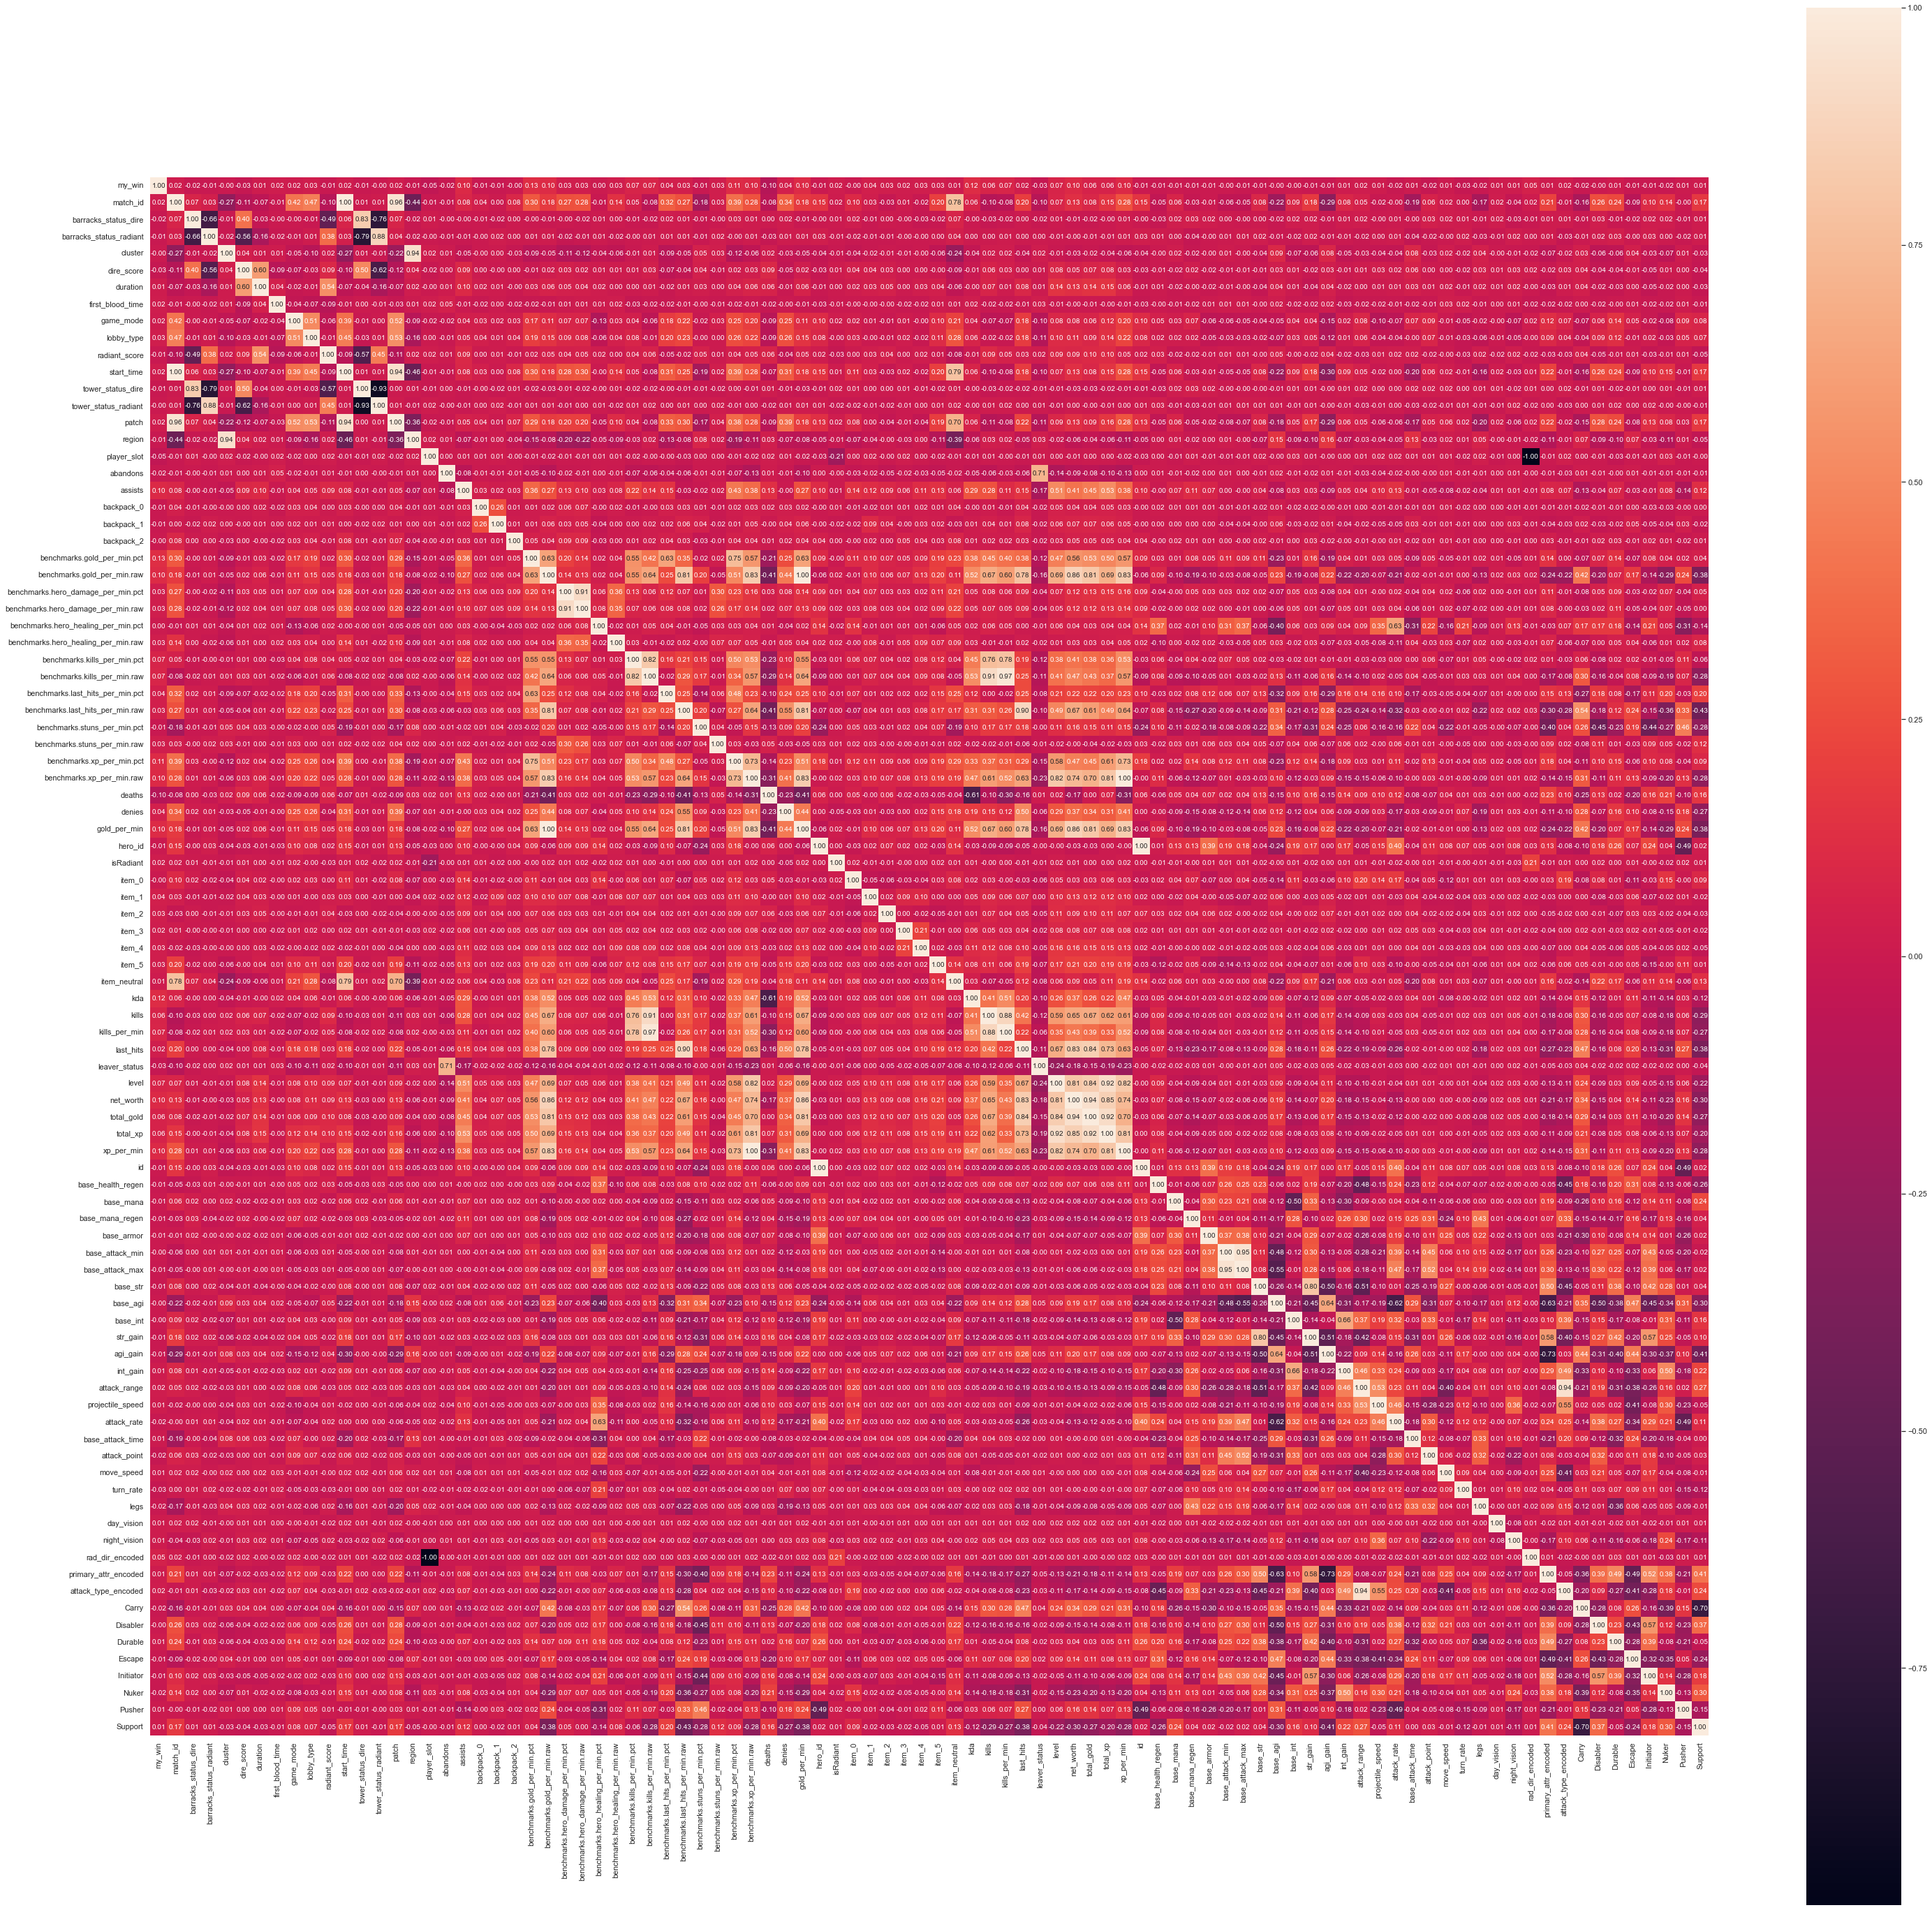

In [170]:
# Need to drop lose column, 100% correlation to target lol

f,ax = plt.subplots(figsize=(50, 50))
cols = data._get_numeric_data().corr()['my_win'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

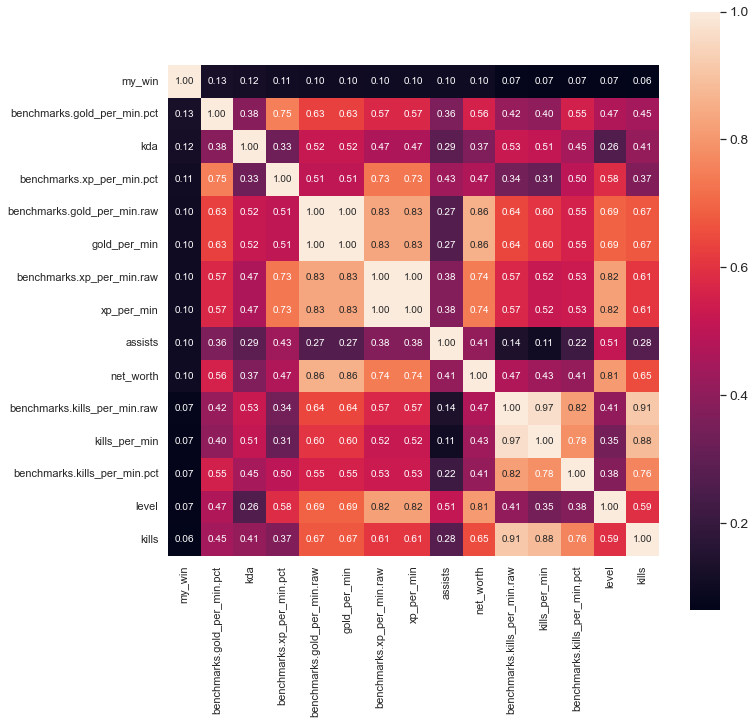

In [171]:
k = 15 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = data._get_numeric_data().corr().nlargest(k, 'my_win')['my_win'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.savefig('heatmap_engineered.png')
plt.show()

In [172]:
data.picks_bans[0]

[{'is_pick': True, 'hero_id': 56, 'team': 0, 'order': 0},
 {'is_pick': True, 'hero_id': 14, 'team': 1, 'order': 1},
 {'is_pick': True, 'hero_id': 57, 'team': 1, 'order': 2},
 {'is_pick': True, 'hero_id': 31, 'team': 0, 'order': 3},
 {'is_pick': True, 'hero_id': 70, 'team': 1, 'order': 4},
 {'is_pick': True, 'hero_id': 94, 'team': 0, 'order': 5},
 {'is_pick': True, 'hero_id': 32, 'team': 1, 'order': 6},
 {'is_pick': True, 'hero_id': 69, 'team': 0, 'order': 7},
 {'is_pick': True, 'hero_id': 74, 'team': 0, 'order': 8},
 {'is_pick': True, 'hero_id': 75, 'team': 1, 'order': 9},
 {'is_pick': False, 'hero_id': 88, 'team': 0, 'order': 10},
 {'is_pick': False, 'hero_id': 105, 'team': 0, 'order': 11},
 {'is_pick': False, 'hero_id': 94, 'team': 0, 'order': 12},
 {'is_pick': False, 'hero_id': 35, 'team': 0, 'order': 13},
 {'is_pick': False, 'hero_id': 14, 'team': 0, 'order': 14},
 {'is_pick': False, 'hero_id': 76, 'team': 1, 'order': 15}]

In [173]:
data.picks_bans.str.len().value_counts()

2.00     756
14.00    698
15.00    587
13.00    560
1.00     427
3.00     397
16.00    349
12.00    288
17.00    182
11.00    103
18.00     59
4.00      53
19.00     10
10.00      6
22.00      4
5.00       3
21.00      2
9.00       1
24.00      1
Name: picks_bans, dtype: int64

In [174]:
data[data.picks_bans.str.len() == 24].reset_index().picks_bans[0]

[{'is_pick': False, 'hero_id': 57, 'team': 0, 'order': 0},
 {'is_pick': False, 'hero_id': 14, 'team': 1, 'order': 1},
 {'is_pick': False, 'hero_id': 98, 'team': 0, 'order': 2},
 {'is_pick': False, 'hero_id': 30, 'team': 1, 'order': 3},
 {'is_pick': True, 'hero_id': 26, 'team': 0, 'order': 4},
 {'is_pick': True, 'hero_id': 51, 'team': 1, 'order': 5},
 {'is_pick': True, 'hero_id': 47, 'team': 1, 'order': 6},
 {'is_pick': True, 'hero_id': 25, 'team': 0, 'order': 7},
 {'is_pick': False, 'hero_id': 52, 'team': 0, 'order': 8},
 {'is_pick': False, 'hero_id': 5, 'team': 1, 'order': 9},
 {'is_pick': False, 'hero_id': 8, 'team': 0, 'order': 10},
 {'is_pick': False, 'hero_id': 21, 'team': 1, 'order': 11},
 {'is_pick': False, 'hero_id': 29, 'team': 0, 'order': 12},
 {'is_pick': False, 'hero_id': 36, 'team': 1, 'order': 13},
 {'is_pick': True, 'hero_id': 64, 'team': 1, 'order': 14},
 {'is_pick': True, 'hero_id': 136, 'team': 0, 'order': 15},
 {'is_pick': True, 'hero_id': 37, 'team': 0, 'order': 16}

In [175]:
data.to_pickle('cleaned_data.pkl')